# Using Linear Regression and Ridge Regression to Predict Quarterback Passing Touchdowns



## Overview
Linear Regression is commonly used to model the effects that independent variables have on a certain dependent variable. Throughout this project, I will explore five years of NFL Quarterback statistics and the influence they have on passing touchdowns.

### Importing Libraries

In [2]:
# for basic operations
import pandas as pd
import numpy as np

# for data visualizations
import plotly.express as px
import seaborn as sns
import cufflinks as cf
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import plotly.figure_factory as ff

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

### Importing Dataset

In [4]:
# reading the dataset through CSV
df = pd.read_csv('Passing_Data(2015-2019).csv')

In [5]:
# drop unnamed columns 
df = df.drop('Unnamed: 0', axis = 1)

df = df.drop('Unnamed: 25', axis = 1)

df = df.drop('Unnamed: 26', axis = 1)

df = df.drop('Unnamed: 27', axis = 1)

df = df.drop('Unnamed: 28', axis = 1)

df = df.drop('Unnamed: 29', axis = 1)

df = df.drop('Unnamed: 30', axis = 1)

In [6]:
# drop any empty rows
df = df.dropna()
df['Year'] = df['Year'].astype(int)

In [7]:
df.head(5)

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Lng,Y/A,AY/A,Y/C,Y/G,Rate,Year,Pro Bowl
0,Jared Goff,LAR,25.0,QB,16.0,16.0,9/7/00,394.0,626.0,62.9,4638.0,22.0,3.5,16.0,2.6,220.0,66.0,7.4,7.0,11.8,289.9,86.5,2019,0.0
1,Jameis Winston,TAM,25.0,QB,16.0,16.0,7/9/00,380.0,626.0,60.7,5109.0,33.0,5.3,30.0,4.8,243.0,71.0,8.2,7.1,13.4,319.3,84.3,2019,0.0
2,Matt Ryan,ATL,34.0,QB,15.0,15.0,7/8/00,408.0,616.0,66.2,4466.0,26.0,4.2,14.0,2.3,228.0,93.0,7.3,7.1,10.9,297.7,92.1,2019,0.0
3,Tom Brady,NWE,42.0,QB,16.0,16.0,12/4/00,373.0,613.0,60.8,4057.0,24.0,3.9,8.0,1.3,193.0,59.0,6.6,6.8,10.9,253.6,88.0,2019,0.0
4,Carson Wentz,PHI,27.0,QB,16.0,16.0,9/7/00,388.0,607.0,63.9,4039.0,27.0,4.4,7.0,1.2,213.0,53.0,6.7,7.0,10.4,252.4,93.1,2019,0.0


**General Information about Dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 24 columns):
Player      149 non-null object
Tm          149 non-null object
Age         149 non-null float64
Pos         149 non-null object
G           149 non-null float64
GS          149 non-null float64
QBrec       149 non-null object
Cmp         149 non-null float64
Att         149 non-null float64
Cmp%        149 non-null float64
Yds         149 non-null float64
TD          149 non-null float64
TD%         149 non-null float64
Int         149 non-null float64
Int%        149 non-null float64
1D          149 non-null float64
Lng         149 non-null float64
Y/A         149 non-null float64
AY/A        149 non-null float64
Y/C         149 non-null float64
Y/G         149 non-null float64
Rate        149 non-null float64
Year        149 non-null int64
Pro Bowl    149 non-null float64
dtypes: float64(19), int64(1), object(4)
memory usage: 29.1+ KB


In [9]:
df.describe()

,Age,G,GS,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Lng,Y/A,AY/A,Y/C,Y/G,Rate,Year,Pro Bowl
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,29.013423,14.543624,14.315436,317.704698,497.167785,63.746309,3639.013423,23.228188,4.654362,10.919463,2.234228,177.510067,70.859060,7.308054,7.233557,11.467785,249.303356,91.887248,2017.000000,0.335570
std,5.227250,2.035108,2.295964,66.963332,94.984309,3.999941,793.015677,7.773066,1.309037,4.330153,0.872769,41.726688,12.140517,0.708588,1.100467,0.867527,36.229608,11.028920,1.423737,0.473782
min,21.000000,7.000000,7.000000,162.000000,283.000000,52.800000,1765.000000,7.000000,2.100000,2.000000,0.300000,80.000000,44.000000,5.700000,4.500000,8.900000,162.700000,60.500000,2015.000000,0.000000
25%,25.000000,14.000000,13.000000,272.000000,436.000000,60.900000,3074.000000,19.000000,3.700000,7.000000,1.600000,149.000000,63.000000,6.800000,6.500000,10.900000,229.200000,85.300000,2016.000000,0.000000
50%,28.000000,15.000000,15.000000,326.000000,508.000000,63.800000,3777.000000,22.000000,4.500000,11.000000,2.200000,182.000000,71.000000,7.300000,7.300000,11.400000,252.400000,92.300000,2017.000000,0.000000
75%,33.000000,16.000000,16.000000,365.000000,571.000000,66.300000,4219.000000,28.000000,5.500000,14.000000,2.700000,206.000000,79.000000,7.800000,7.900000,12.000000,272.200000,99.300000,2018.000000,1.000000
max,42.000000,16.000000,16.000000,471.000000,675.000000,74.400000,5208.000000,50.000000,9.000000,30.000000,5.100000,268.000000,98.000000,9.600000,10.200000,13.700000,328.200000,117.500000,2019.000000,1.000000


## Why is this Topic Important?

**The following data visualizations are included to help depict how important passing touchdowns are in relation to team success in the NFL.**

In [10]:
df1 = pd.read_csv('Passing_vs_rushing.csv')

df1['P_FirstDown_Efficency'] = df1['Passing_First_Downs'] / df1['Total_Passing_Attempts']
df1['R_FirstDown_Efficency'] = df1['Rushing_First_Downs'] / df1['Total_Rushing_Attempts']


df1['P_TD_Efficency'] = df1['Passing_Touchdowns'] / df1['Total_Passing_Attempts']
df1['R_TD_Efficency'] = df1['Rushing_Touchdowns'] / df1['Total_Rushing_Attempts']

df1['SBC_P_TD_Efficency'] = df1['SBC_Total_Passing_TD'] / df1['SBC_Total_Passing_Attempts']
df1['SBC_R_TD_Efficency'] = df1['SBC_Total_Rushing_TD'] / df1['SBC_Total_Rushing_Attempts']

df1.head()

,Year,Total_Passing_Attempts,Total_Rushing_Attempts,Passing_Touchdowns,Rushing_Touchdowns,Passing_First_Downs,Rushing_First_Downs,Super_Bowl_Champion,SBC_Total_Passing_Attempts,SBC_Total_Passing_TD,SBC_Total_Passing_Yards,SBC_Total_Rushing_Attempts,SBC_Total_Rushing_TD,SBC_Total_Rushing_Yards,Offense_Ranking,P_FirstDown_Efficency,R_FirstDown_Efficency,P_TD_Efficency,R_TD_Efficency,SBC_P_TD_Efficency,SBC_R_TD_Efficency
0,2019,17853,13387,797,447,6200,3451,Kansas City Chiefs,576,30,4498,375,16,1569,5,0.347281,0.257787,0.044642,0.033391,0.052083,0.042667
1,2018,17671,13272,847,439,6276,3206,New England Patriots,574,29,4258,478,18,2037,4,0.355158,0.241561,0.047932,0.033077,0.050523,0.037657
2,2017,17448,13755,741,380,5921,3420,Philadelphia Eagles,564,38,3737,473,9,2115,3,0.339351,0.248637,0.042469,0.027626,0.067376,0.019027
3,2016,18295,13321,786,443,6368,3038,New England Patriots,550,32,4308,482,19,1872,3,0.348073,0.228061,0.042963,0.033256,0.058182,0.039419
4,2015,18298,13488,842,365,6289,2973,Denver Broncos,606,19,3970,411,13,1718,19,0.343699,0.220418,0.046016,0.027061,0.031353,0.031630


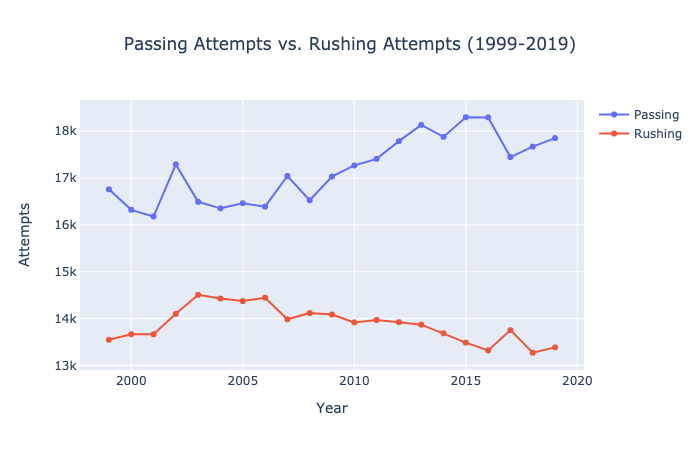

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df1['Year'], y = df1['Total_Passing_Attempts'],mode='lines+markers', name = 'Passing'))
fig.add_trace(go.Scatter(x = df1['Year'], y = df1['Total_Rushing_Attempts'],mode='lines+markers', name = 'Rushing'))

fig.update_layout(
    title='Passing Attempts vs. Rushing Attempts (1999-2019)',
    title_x=0.5,
    xaxis_title="Year",
    yaxis_title="Attempts",
)

fig.show('png')

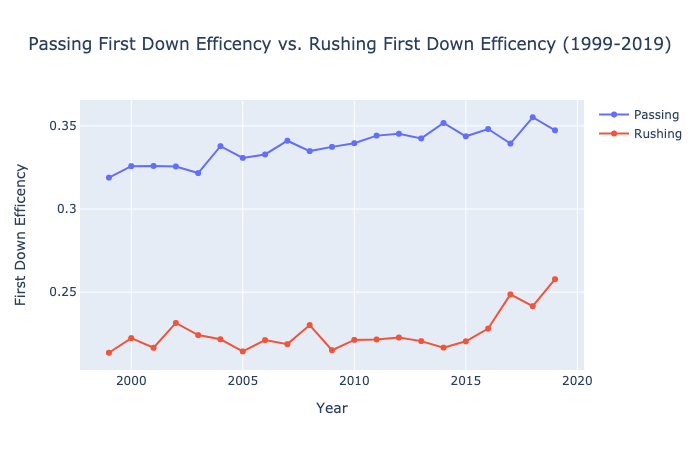

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df1['Year'], y = df1['P_FirstDown_Efficency'],mode='lines+markers', name = 'Passing'))
fig.add_trace(go.Scatter(x = df1['Year'], y = df1['R_FirstDown_Efficency'],mode='lines+markers', name = 'Rushing'))

fig.update_layout(
    title='Passing First Down Efficency vs. Rushing First Down Efficency (1999-2019)',
    title_x=0.5,
    xaxis_title="Year",
    yaxis_title="First Down Efficency",
)

fig.show('png')

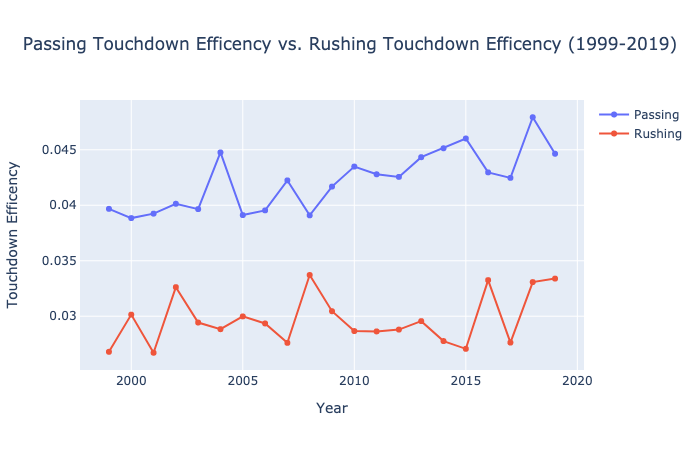

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df1['Year'], y = df1['P_TD_Efficency'],mode='lines+markers', name = 'Passing'))
fig.add_trace(go.Scatter(x = df1['Year'], y = df1['R_TD_Efficency'],mode='lines+markers', name = 'Rushing'))

fig.update_layout(
    title='Passing Touchdown Efficency vs. Rushing Touchdown Efficency (1999-2019)',
    title_x=0.5,
    xaxis_title="Year",
    yaxis_title="Touchdown Efficency",
)

fig.show('png')

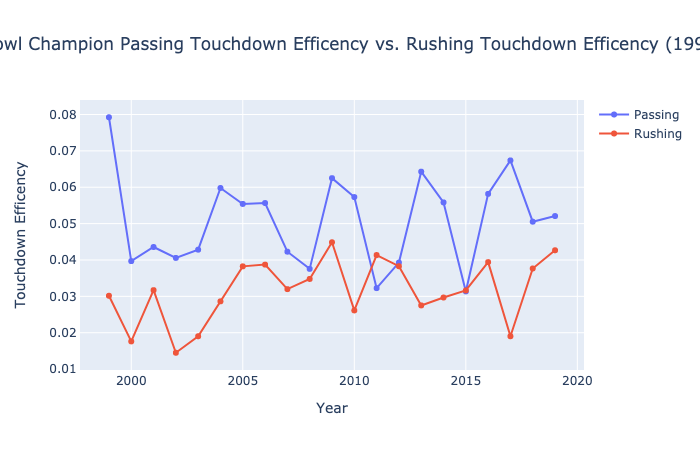

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df1['Year'], y = df1['SBC_P_TD_Efficency'],mode='lines+markers', name = 'Passing'))
fig.add_trace(go.Scatter(x = df1['Year'], y = df1['SBC_R_TD_Efficency'],mode='lines+markers', name = 'Rushing'))

fig.update_layout(
    title=' Super Bowl Champion Passing Touchdown Efficency vs. Rushing Touchdown Efficency (1999-2019)',
    title_x=0.5,
    xaxis_title="Year",
    yaxis_title="Touchdown Efficency",
)

fig.show('png')

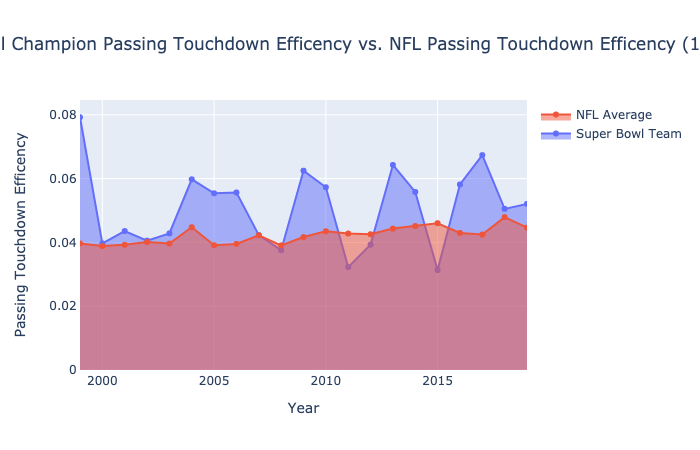

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df1['Year'], y = df1['SBC_P_TD_Efficency'],mode='lines+markers', name = 'Super Bowl Team', fill='tonexty'))
fig.add_trace(go.Scatter(x = df1['Year'], y = df1['P_TD_Efficency'],mode='lines+markers', name = 'NFL Average', fill='tozeroy'))

fig.update_layout(
    title=' Super Bowl Champion Passing Touchdown Efficency vs. NFL Passing Touchdown Efficency (1999-2019)',
    title_x=0.5,
    xaxis_title="Year",
    yaxis_title="Passing Touchdown Efficency",
)



fig.show('png')

**In conclusion, the NFL for the past 20 years continues to be a "Pass First" offense. In other words, teams continue to prefer to pass the ball far more than running the ball. This is attributed to the significantly higher success of moving the ball (first down efficency) and scoring (touchdown efficency) by passing compared to running. Furthermore, successful teams, such as the team that wins the Super Bowl each year, produce a higher touchdown efficency than the NFL average. Given this information, data analytics and predictions will be done on the amount of touchdowns a Quarterback can throw in a single year.**

# Data Analysis and Visualizations

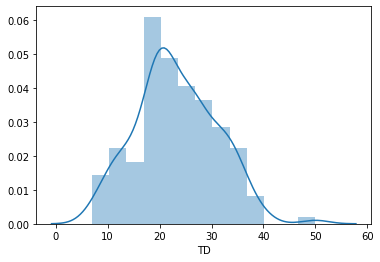

In [80]:
#Displays a relatively normal distribution for Touchdowns
sns.distplot(df['TD'])

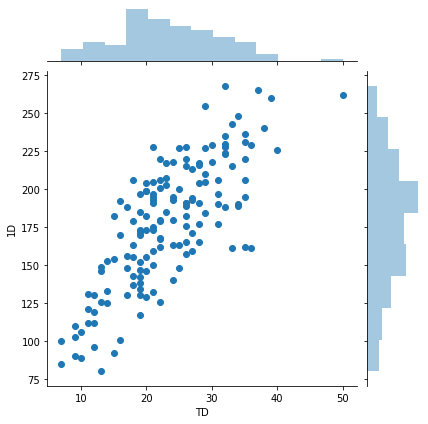

In [81]:
# Displays a relatively strong correlation between Touchdowns and First Downs
sns.jointplot(data = df, x = 'TD', y = '1D')

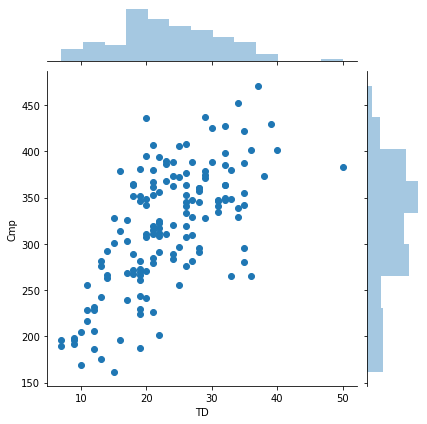

In [82]:
# Similar correlation when comparing Touch Downs and Completions
sns.jointplot(data = df, x = 'TD', y = 'Cmp')

In [83]:
# Table of variables and their correlation in relation to one another
df.corr()

,Age,G,GS,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Lng,Y/A,AY/A,Y/C,Y/G,Rate,Year,Pro Bowl
Age,1.000000,0.034878,0.057070,0.308649,0.234852,0.339025,0.273658,0.216770,0.110585,-0.135476,-0.251137,0.270188,0.030268,0.171080,0.225326,-0.064569,0.382572,0.275496,-0.078079,0.189147
G,0.034878,1.000000,0.973847,0.778068,0.808959,0.198502,0.766244,0.538403,0.114124,0.185952,-0.261617,0.747275,0.177050,0.168433,0.226823,0.053998,0.181322,0.234727,0.006996,0.243998
GS,0.057070,0.973847,1.000000,0.801645,0.822815,0.236629,0.789102,0.569898,0.145330,0.157527,-0.306197,0.767554,0.202072,0.194042,0.265878,0.057038,0.250164,0.280228,-0.018603,0.268511
Cmp,0.308649,0.778068,0.801645,1.000000,0.959886,0.469171,0.936161,0.653219,0.154362,0.195773,-0.316960,0.925104,0.236618,0.252254,0.307729,-0.059879,0.657528,0.373500,-0.016938,0.228256
Att,0.234852,0.808959,0.822815,0.959886,1.000000,0.209062,0.905734,0.604974,0.060436,0.326653,-0.203752,0.888743,0.214889,0.096877,0.145686,-0.041523,0.580658,0.178796,-0.054461,0.156091
Cmp%,0.339025,0.198502,0.236629,0.469171,0.209062,1.000000,0.428496,0.400150,0.392721,-0.347250,-0.491349,0.442889,0.130466,0.617469,0.662257,-0.043417,0.467981,0.784203,0.132884,0.334378
Yds,0.273658,0.766244,0.789102,0.936161,0.905734,0.428496,1.000000,0.769104,0.328590,0.201801,-0.295777,0.966304,0.284280,0.499134,0.500302,0.286601,0.763646,0.487992,-0.035859,0.347900
TD,0.216770,0.538403,0.569898,0.653219,0.604974,0.400150,0.769104,1.000000,0.813748,0.007977,-0.339092,0.774466,0.246645,0.580893,0.683937,0.406001,0.640370,0.707082,-0.023201,0.527645
TD%,0.110585,0.114124,0.145330,0.154362,0.060436,0.392721,0.328590,0.813748,1.000000,-0.239176,-0.316564,0.343414,0.177818,0.685276,0.788165,0.537690,0.402942,0.799041,0.046405,0.544528
Int,-0.135476,0.185952,0.157527,0.195773,0.326653,-0.347250,0.201801,0.007977,-0.239176,1.000000,0.837099,0.217086,0.059677,-0.217357,-0.492021,0.019450,0.105776,-0.534598,-0.055895,-0.296326


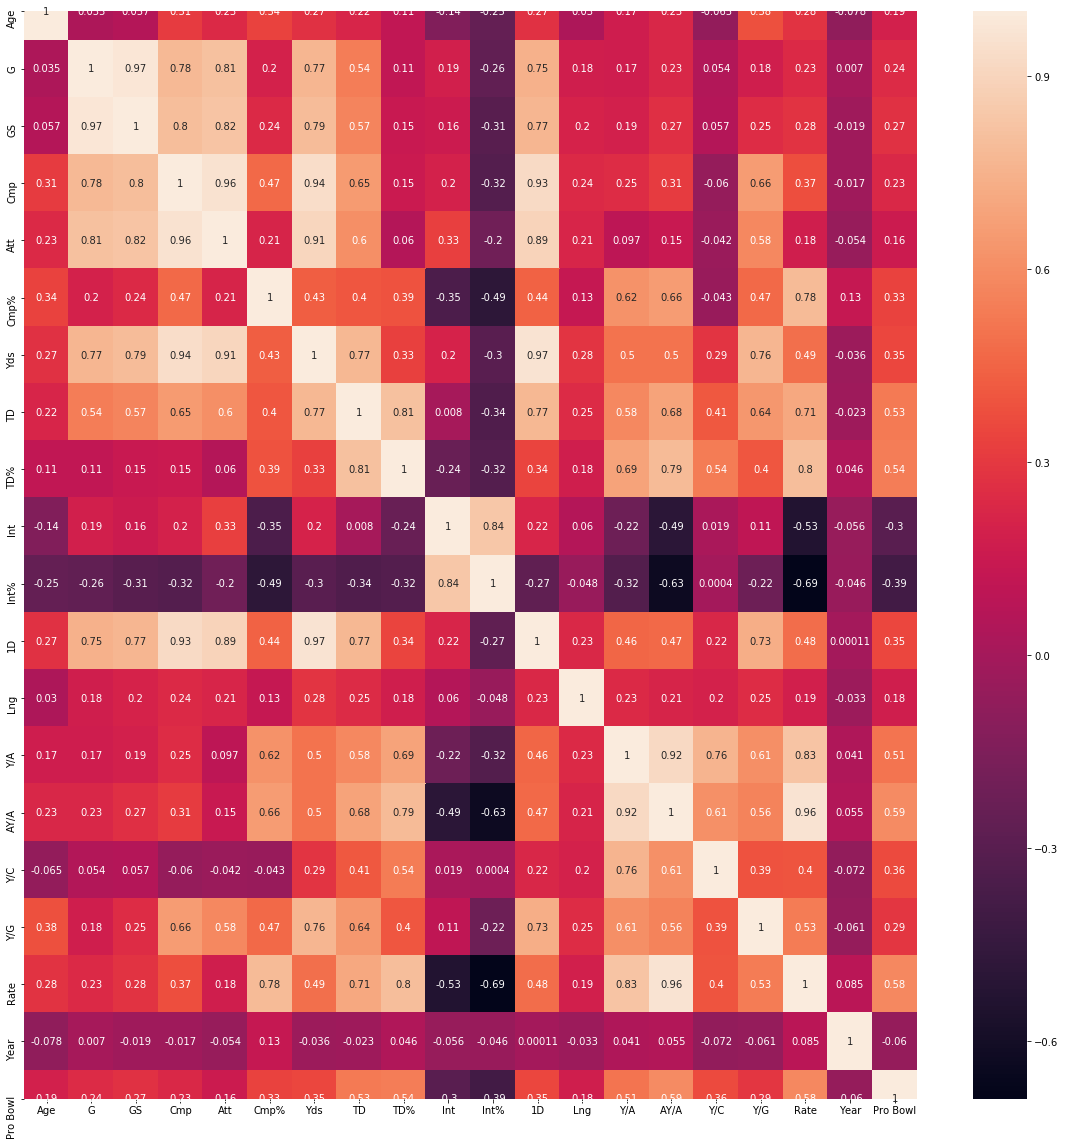

In [84]:
#Heatmap that describes correlation of variables
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

**After reviewing the correlation table and heatmap, it is evident that yards, first downs, and completions have a strong correlation with touchdowns.**


# Training and Testing Data
## Linear Regression

In [85]:
# Independent variables
X = df[['G', 'GS', 'Cmp', 'Att', 'Cmp%','Yds', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate']]

In [86]:
# Depedent Variable (What we are trying to predict)
y = df['TD']

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lm = LinearRegression()

In [91]:
# training/fitting of the training data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
print(lm.intercept_)

27.756757056960225


In [93]:
# coefficients of the model
pd.DataFrame(lm.coef_,X.columns, columns = ['Coeff'])

,Coeff
G,-0.315078
GS,-0.028519
Cmp,-0.071179
Att,-0.018394
Cmp%,-0.356767
Yds,0.016193
TD%,3.530373
Int,0.005677
Int%,0.837162
1D,0.005627


In [94]:
predictions = lm.predict(X_test)

In [95]:
predictions

array([17.17105429, 18.12355073, 34.17516543, 35.72381092, 34.67349326,
       36.88879309, 23.10637627,  7.26313827, 21.02531937, 33.93556991,
       13.06029224, 26.88753683, 35.57052355, 27.61486077, 26.95209315,
       19.21515378, 31.2828355 , 19.16058843, 22.48235982, 28.61102961,
       27.76150753, 19.4289816 ,  9.86134822, 22.36585876, 32.02142341,
       39.19930993, 19.79524783, 32.89420974, 29.50547052,  5.8181979 ,
        7.05576398, 33.80004253, 28.7249895 , 17.62014458, 24.33904574,
       16.74979072, 34.53440194, 24.04185858, 17.99402781, 16.86891822,
       16.96711461, 26.3134709 , 21.39691304, 30.47839173, 17.47856623])

In [96]:
y_test

16     17.0
55     19.0
124    35.0
89     37.0
32     35.0
92     40.0
91     23.0
118     9.0
69     20.0
1      33.0
80     13.0
67     27.0
31     39.0
101    28.0
94     25.0
133    19.0
120    32.0
100    18.0
74     22.0
33     30.0
64     28.0
41     19.0
88      9.0
42     22.0
43     32.0
25     36.0
102    20.0
65     34.0
128    31.0
145     7.0
146     9.0
82     33.0
61     28.0
85     18.0
48     24.0
93     16.0
134    35.0
21     24.0
22     18.0
29     13.0
50     17.0
96     26.0
13     21.0
125    32.0
66     18.0
Name: TD, dtype: float64

Text(0, 0.5, 'Predicted Values')

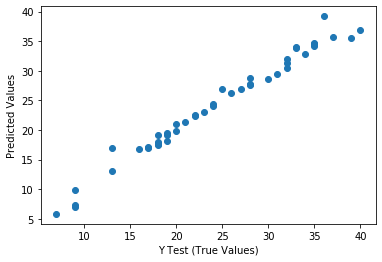

In [97]:
#scatterplot of True Values and Predicted Values
plt.scatter(y_test, predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

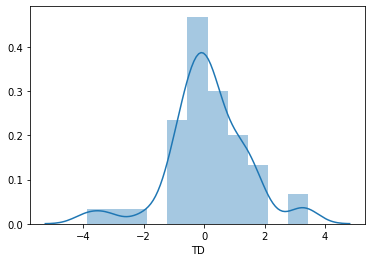

In [98]:
# Histogram of the Residuals
sns.distplot((y_test - predictions))

## Evaluating the Model

In [99]:
from sklearn import metrics

# Mean Absolute Error
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

# Mean Squared Error
print('MSE:', metrics.mean_squared_error(y_test, predictions))

# Root Mean Squared Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Explained Variance Score (R^2)
print('Explained Variance Score:' ,(metrics.explained_variance_score(y_test, predictions)))

MAE: 0.9222883569112944
MSE: 1.726651669598942
RMSE: 1.3140211830860802
Explained Variance Score: 0.9772632799571958


**After implementing linear regression on the dataset, the model was able to explain over 97% of the data. However, after reviewing the variance  inflation factor (VIF), it is clear that the independent variables are heavily correlated in relation to one another. Also referred to as multicollinearity, the prediction model includes numerous factors that not only correlate with the dependent variable, but also each other.**

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['G', 'GS', 'Cmp', 'Att', 'Cmp%','Yds', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [101]:
# list of features and their variance inflation factors
vif

,VIF,features
0,6217.762621,G
1,1031.839994,GS
2,12696.738039,Cmp
3,10392.902669,Att
4,14287.373111,Cmp%
5,5402.218089,Yds
6,238.363175,Int
7,472.792776,Int%
8,356.913927,1D
9,43.132925,Lng


**To mitigate this issue, I took 2 different approaches in hopes of finding the best predictive model:**
1. Removing highly correlated predictors from the model
2. Ridge analysis

## Removing Highly Correlated Predictors from the Model

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['1D', 'Int']]
vif1 = pd.DataFrame()
vif1['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif1['features'] = variables.columns

In [103]:
vif1

,VIF,features
0,6.811696,1D
1,6.811696,Int


**I was able to determine that the pair of features with the highest correlation to the dependent variable (Touchdowns) while maintaining the lowest variance influence factor were First Downs and Interceptions.**

## Training and Testing Data with Reduced Predictors

In [104]:
new_X = df[['1D', 'Int']]
new_y = df['TD']
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=101)
new_lm = LinearRegression()
new_lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
new_predictions = new_lm.predict(X_test)
new_predictions

array([23.01068476, 18.24940065, 27.17212978, 34.87622118, 33.07645869,
       31.57686096, 25.85992046, 11.85727335, 25.93477774, 26.79759816,
       17.48088746, 24.866345  , 34.12642232, 26.64690275, 30.13365139,
       20.94867657, 30.60224503, 28.25903162, 19.86152952, 29.42128117,
       26.04730887, 26.27212592,  9.58916243, 28.25903162, 31.33332958,
       22.14810955, 28.16521481, 24.75381387, 23.91019819,  9.4766313 ,
       10.99518857, 21.82947568, 29.27132139, 17.59317338, 20.53622589,
       24.24779159, 25.97220638, 17.0871511 , 19.44883363,  9.0454663 ,
       14.63165177, 28.44666525, 26.00963502, 29.36513821, 20.21759203])

Text(0, 0.5, 'Predicted Values')

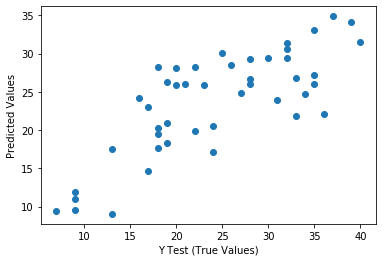

In [106]:
# New scatterplot of True Values and Predicted Values

plt.scatter(y_test, new_predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

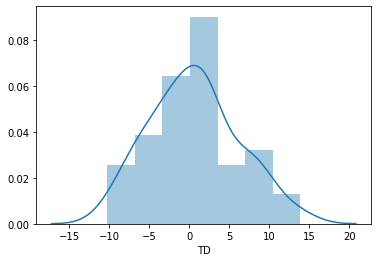

In [107]:
sns.distplot((y_test - new_predictions))

In [108]:
# Mean Absolute Error
print('New MAE:', metrics.mean_absolute_error(y_test, new_predictions))

# Mean Squared Error
print('New MSE:', metrics.mean_squared_error(y_test, new_predictions))

# Root Mean Squared Error
print('New RMSE:', np.sqrt(metrics.mean_squared_error(y_test, new_predictions)))

# Explained Variance Score (R^2)
print('New Explained Variance Score:' ,(metrics.explained_variance_score(y_test, new_predictions)))

New MAE: 4.43016562040293
New MSE: 30.28625317083337
New RMSE: 5.503294755946965
New Explained Variance Score: 0.6025334908389499


**After the new predictve model, we can see that the explained variance score dropped significantly from 97% to 60%. Despite this drop,the model still produced relatively low MAE, MSE, and RMSE while removing multicollinearity.**

## Ridge Regression

**Ridge Regression is a commonly used tool for datasets that suffer from multicollinearity. Through this method, a degree of bias is added to reduce standard errors.**

In [109]:
from sklearn.linear_model import Ridge

In [110]:
Ridge_y = df['TD']
Ridge_X = df[['G', 'GS', 'Cmp', 'Att', 'Cmp%','Yds', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate']]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(Ridge_X, Ridge_y, test_size=0.3, random_state=101)

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [112]:
print(ridge.intercept_)

44.53708566457548


In [113]:
Ridge_predictions = ridge.predict(X_test)

In [114]:
Ridge_predictions


array([17.26313572, 18.0572066 , 33.71058208, 35.58385802, 34.47161383,
       37.02092344, 23.36184543,  7.22038715, 20.9943375 , 33.75344094,
       13.04418469, 26.84801332, 35.85129716, 27.41840232, 26.84207588,
       19.12036015, 31.24584082, 19.3580274 , 22.44076276, 28.64338465,
       27.74173889, 19.52593677,  9.02980672, 22.37167253, 32.24386678,
       38.80285969, 19.67154341, 32.63071129, 29.37386774,  5.9826891 ,
        6.82749021, 33.7549758 , 28.70669225, 17.47744257, 24.03649763,
       17.0729427 , 34.4821771 , 23.67144626, 18.13417835, 15.75803849,
       16.91028662, 26.3970515 , 21.37917376, 30.6050738 , 17.57469733])

Text(0, 0.5, 'Predicted Values')

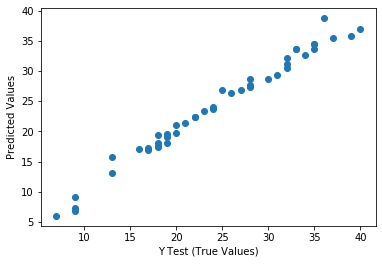

In [115]:
plt.scatter(y_test, Ridge_predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

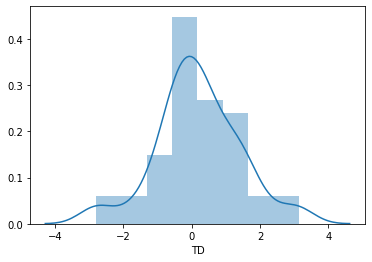

In [116]:
sns.distplot((y_test - Ridge_predictions))

In [117]:
# Mean Absolute Error
print('Ridge MAE:', metrics.mean_absolute_error(y_test, Ridge_predictions))

# Mean Squared Error
print('Ridge MSE:', metrics.mean_squared_error(y_test, Ridge_predictions))

# Root Mean Squared Error
print('Ridge RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Ridge_predictions)))

# Explained Variance Score (R^2)
print('Ridge Explained Variance Score:' ,(metrics.explained_variance_score(y_test, Ridge_predictions)))

Ridge MAE: 0.9193597710157159
Ridge MSE: 1.5217635350909853
Ridge RMSE: 1.2335978011860207
Ridge Explained Variance Score: 0.9802964439835279


# Conclusion

**Upon creating the new predictive model using ridge analysis, we can see that the results far surpassed the reduced features predictive model and is relatively similar to the original predictive model without taking multicollinearlity into consideration. Through this method, the model is able to increase its efficiency with regards to parameter estimation in exchange for a slight bias.** 